** D'abord, le preprocessing habituel sur les CV. Puis application du tutorial ci-dessous, pour faire du Hierachical Clustering (avec scipy.clustering), puis représentation par Dendrogrammes **

https://joernhees.de/blog/2015/08/26/scipy-hierarchical-clustering-and-dendrogram-tutorial/#Knowing-k:

In [2]:
import numpy as np
import pandas as pd
import nltk
import re
import os
import codecs
from sklearn import feature_extraction
import pickle
from glob import glob
import csv
import os.path as op
import mpld3
# pip install mpld3
import stop_words
# pip install stop-words
from nltk import SnowballStemmer, pos_tag, word_tokenize, wordpunct_tokenize
from nltk.corpus import stopwords
import unidecode
# pip install unidecode

** Lecture des données **

In [3]:
class CV:
    def __init__(self, filename, title, cv):
        self.filename = filename
        self.title = title
        self.cv = cv

In [4]:
# Load data
print("Loading cvs")

#filenames = sorted(glob(op.join('/Users/very/Documents/MP/FilRouge/Maha/data/txt/**/'+'*.txt')))

#download cv in a list
def load_cv_list(nombre):
    path = '/Users/very/Documents/MP/FilRouge/Maha/data/txt/'
    liste_paths = [path+directory for directory in os.listdir(path)]
    liste_cv = []
    dico_cv = {}
    for path in liste_paths:
        filenames = sorted(glob(os.path.join(path,"*.txt")))
        for file in filenames[:nombre]:
            cv = CV(0, 0, 0)
            cv.filename = os.path.basename(file)
            cv.cv = open(file).read()
            liste_cv.append(cv.cv)
            
            dico_cv[cv.filename.split(".")[0]] = cv.cv
    return liste_cv, dico_cv

Loading cvs


In [5]:
print("Loading titles")
def load_title_list(nombre):
    path = "/Users/very/Documents/MP/FilRouge/Maha/data/"
    dico_titles = {}
    filenames = sorted(glob(os.path.join(path,"*.csv")))
    for file in filenames[:nombre]:
        with open(file, encoding='latin-1') as csvfile:
            readCSV = csv.reader(csvfile, delimiter=';')
            for row in readCSV:
                dico_titles[row[0]] = row[1]
    return dico_titles
        
"""     
for file in filenames[:nombre]:
        text = open(file).read()
        for row in text:
            print(row)
            #line = row.split(";")
            #print(line[0])
            #dico_titles[line[0]] = line[1]
        #liste_cv.append(text)
        #dico_cv[os.path.basename(file).split(".")[0]] = text
return dico_titles
"""


Loading titles


'     \nfor file in filenames[:nombre]:\n        text = open(file).read()\n        for row in text:\n            print(row)\n            #line = row.split(";")\n            #print(line[0])\n            #dico_titles[line[0]] = line[1]\n        #liste_cv.append(text)\n        #dico_cv[os.path.basename(file).split(".")[0]] = text\nreturn dico_titles\n'

In [6]:
liste_cv, dico_cv = load_cv_list(150)
dico_titles = load_title_list(150)

In [7]:
len(liste_cv)

1650

In [8]:
len(dico_cv)

1650

In [9]:
len(dico_titles)

6963

In [10]:
#for filename in glob.iglob('src/**/*.c', recursive=True):
#    print(filename)
dico_titles

{'cv_data engineer_1': 'Stagiaire Data Engineer',
 'cv_data engineer_2': 'Project Design Engineer Voice and Data',
 'cv_data engineer_3': 'Data Engineer',
 'cv_data engineer_4': 'Engineer',
 'cv_data engineer_5': 'Data Analyst',
 'cv_data engineer_6': 'IngÃ©nieur Diagraphiste (DATA ENGINEER)',
 'cv_data engineer_7': 'Software Engineer Big Data Analytics',
 'cv_data engineer_8': 'Data Scientist',
 'cv_data engineer_9': 'Data Engineer',
 'cv_data engineer_10': 'Alternante data analyst',
 'cv_data engineer_11': 'Project Data Manager',
 'cv_data engineer_12': 'scientist/architect',
 'cv_data engineer_13': 'Application Engineer',
 'cv_data engineer_14': 'Specialization in Data Science',
 'cv_data engineer_15': 'Sourcing & Procurement Functional Consultant',
 'cv_data engineer_16': 'Data Analyst',
 'cv_data engineer_17': 'Telecom Engineer',
 'cv_data engineer_18': 'Network Engineer',
 'cv_data engineer_19': 'Pre-Sales Consultant storage/content and Content solution Specialist',
 'cv_data eng

In [11]:
# Remplir un dico de cv dont la clé est le nom du fichier, et la valeur, un CV

for key, value in dico_cv.items():
    filename = key
    cv = CV(0, 0, 0)
    cv.filename = key
    
    if key in dico_titles.keys():
        cv.title = dico_titles[key]
    else:
        cv.title = ""
        
    cv.cv = dico_cv[key]
    
    dico_cv[key] = cv


# elements qui n'ont pas de titres...
len(dico_cv)
for key, value in dico_cv.items():
    #print(value.title)
    if value.title == "":
        print(key)

#### Suppression des sauts de ligne et text.lower()

In [12]:
import string,re
regex = re.compile('[%s]' % '(\\n)*(\\x0c)*')
def del_line_feed(s):  
    """Delete \n in the text"""
    return regex.sub(' ', s)

In [13]:
#liste_cv = [del_line_feed(text).lower() for text in liste_cv]
#liste_cv = ()
for key, cv in dico_cv.items():
    cv.cv = del_line_feed(cv.cv).lower()
    dico_cv[key] = cv
#liste_cv = [del_line_feed(text).lower() for text in dico_cv.values]

In [14]:
#liste_cv[0]
for key, value in dico_cv.items():
    print(value.cv)
    break

administrateur réseaux et sécurité  nanterre  92  - email me on indeed: indeed.com/r/38feb844e66fc577  expérience  administrateur réseaux et sécurité  it delivery services  -  paris  75  -  août 2017 - novembre 2017  it delivery services – administrateur réseau et sécurité paris mission chez atos : administration des pare-feu  fortigate 5000 et 1500  〓 piloter un projet de migration de 70 vdom 〓 etude de l’existant et préparation des schémas cible 〓 création de la matrice de flux 〓 mettre en place un plan d’adressage, vlan et routage 〓 upgrade des fortios 〓 analyse et comparaison les fichiers de configuration 〓 résolution des problèmes technique. 〓 analyse de risque et création des modes opératoires de migration  administrateur systèmes, réseaux et virtualisation  atento  intelcia   -  casablanca -  novembre 2006 - mai 2017  -réseau  switch, routeur, firewall   cisco, dell, hp, fortigate, peplink  〓 configuration et attribution des adresses ip, vlan, vpn  ssl & ipsec , stp, vrrp, routa

#### Suppression ponctuation

In [15]:
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [16]:
#le maintient de la ponctuation pertube le stop words, apostrophe gérée dans text_treatment
regex = re.compile('[%s]' % re.escape('!"#$%&\()*+,-./:;<=>?@[\\]^_{|}~')) 

def del_punct(s):  
    """Delete punctuation in the text"""
    return regex.sub('', s)

In [17]:
#test 
#liste_cv_no_punc = [del_punct(text) for text in liste_cv]
for key, cv in dico_cv.items():
    cv.cv = del_punct(cv.cv)
    dico_cv[key] = cv

In [18]:
#liste_cv_no_punc[0]
for key, value in dico_cv.items():
    print(value.cv)
    break

administrateur réseaux et sécurité  nanterre  92   email me on indeed indeedcomr38feb844e66fc577  expérience  administrateur réseaux et sécurité  it delivery services    paris  75    août 2017  novembre 2017  it delivery services – administrateur réseau et sécurité paris mission chez atos  administration des parefeu  fortigate 5000 et 1500  〓 piloter un projet de migration de 70 vdom 〓 etude de l’existant et préparation des schémas cible 〓 création de la matrice de flux 〓 mettre en place un plan d’adressage vlan et routage 〓 upgrade des fortios 〓 analyse et comparaison les fichiers de configuration 〓 résolution des problèmes technique 〓 analyse de risque et création des modes opératoires de migration  administrateur systèmes réseaux et virtualisation  atento  intelcia     casablanca   novembre 2006  mai 2017  réseau  switch routeur firewall   cisco dell hp fortigate peplink  〓 configuration et attribution des adresses ip vlan vpn  ssl  ipsec  stp vrrp routage  statique et dynamique  na

#### Reconnaissance langage

In [19]:
def _calculate_languages_ratios(text):
    """
    Calculate probability of given text to be written in several languages and
    return a dictionary that looks like {'french': 2, 'spanish': 4, 'english': 0}
    """

    languages_ratios = {}

    '''
    nltk.wordpunct_tokenize() splits all punctuations into separate tokens
    
    >>> wordpunct_tokenize("That's thirty minutes away. I'll be there in ten.")
    ['That', "'", 's', 'thirty', 'minutes', 'away', '.', 'I', "'", 'll', 'be', 'there', 'in', 'ten', '.']
    '''
    
    tokens = wordpunct_tokenize(text)
    words = [word.lower() for word in tokens] #from text get list of word in minuscule

    
    for language in stopwords.fileids(): # pour chaque langue
        stopwords_set = set(stopwords.words(language)) #je mets les stop words du langage dans un set
        words_set = set(words) #je mets les mots de mon texte dans un set
        #je prends l'intersection entre les mots de mon texte et les mots du stopwords dans le langage donné
        common_elements = words_set & stopwords_set
        
        #je compute mon score comme le nombre d'éléments en communs dictionnaire [langage : score]
        languages_ratios[language] = len(common_elements) # language "score"

    return languages_ratios

In [20]:
import nltk
nltk.download('stopwords')
stopwords.fileids()

[nltk_data] Downloading package stopwords to /Users/very/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


['arabic',
 'azerbaijani',
 'danish',
 'dutch',
 'english',
 'finnish',
 'french',
 'german',
 'greek',
 'hungarian',
 'indonesian',
 'italian',
 'kazakh',
 'nepali',
 'norwegian',
 'portuguese',
 'romanian',
 'russian',
 'spanish',
 'swedish',
 'turkish']

In [21]:
def get_cv_langue(liste_cv, language) :
    """Return resume written in the specified language in parameter"""
    liste_2 = []
    for cv in liste_cv:
        if max(_calculate_languages_ratios(cv), key =_calculate_languages_ratios(cv).get)=='french':
            liste_2.append(cv)
    return liste_2

In [22]:
#liste_cv_fr = get_cv_langue(liste_cv_no_punc, 'french')
for k, cv in dico_cv.items():
    #print(cv.cv)
    calc = _calculate_languages_ratios(cv.cv)
    #print(calc)
    if max(calc, key=calc.get)!='french':
        #print(key)
        ##del dico_cv[key]
        cv.cv = ""
        dico_cv[k] = cv

dico_cv = {key:dico_cv[key] for key in dico_cv if dico_cv[key].cv != ""}        
len(dico_cv)
#nb_cv = len(liste_cv_no_punc)
#nb_cv_fr = len(liste_cv_fr)

#print("proportion cv french :",1- ((nb_cv-nb_cv_fr)/nb_cv))


1182

In [23]:
for key, value in dico_cv.items():
    print(value.cv)
    break

administrateur réseaux et sécurité  nanterre  92   email me on indeed indeedcomr38feb844e66fc577  expérience  administrateur réseaux et sécurité  it delivery services    paris  75    août 2017  novembre 2017  it delivery services – administrateur réseau et sécurité paris mission chez atos  administration des parefeu  fortigate 5000 et 1500  〓 piloter un projet de migration de 70 vdom 〓 etude de l’existant et préparation des schémas cible 〓 création de la matrice de flux 〓 mettre en place un plan d’adressage vlan et routage 〓 upgrade des fortios 〓 analyse et comparaison les fichiers de configuration 〓 résolution des problèmes technique 〓 analyse de risque et création des modes opératoires de migration  administrateur systèmes réseaux et virtualisation  atento  intelcia     casablanca   novembre 2006  mai 2017  réseau  switch routeur firewall   cisco dell hp fortigate peplink  〓 configuration et attribution des adresses ip vlan vpn  ssl  ipsec  stp vrrp routage  statique et dynamique  na

** text processing **

In [24]:
def text_treatment (text):
    text = text.lower()
    text = text.replace("\x00", '').replace("\x01", '').replace("\x02", '').replace("\x03", '') \
    .replace("\x04", '').replace("\x05", '').replace("\x06", '').replace("\x07", '').replace("\x08", '') \
    .replace("\x0e", '').replace("\x11", '').replace("\x12", '').replace("\x10", '').replace("\x19", '') \
    .replace("\x1b", '').replace("\x14", '').replace("\x15", '').replace('/', '').replace('=', '') \
    .replace("»", "").replace("«", "").replace("¬", "").replace('`', '').replace (" -", "").replace("•", "")\
    .replace("l'", "").replace("l’", "").replace("l´", "").replace("d’", "").replace("d'", "").replace("d´","")\
    .replace("j’", "").replace("j'", "").replace("j´","")\
    .replace("”", "").replace("~", "").replace("§", "").replace("¨", "").replace("©", "").replace("›", "")\
    .replace("₋", "").replace("→", "").replace("⇨", "").replace("∎", "").replace("√", "").replace("□", "")\
    .replace("*", "").replace("&", "").replace("►", "").replace("◊", "").replace("☞", "").replace("#", "")\
    .replace("%", "").replace("❖", "").replace("➠", "").replace("➢", "").replace("", "").replace("✓", "") \
    .replace("√", "").replace("✔", "").replace("♦", "").replace("◦", "").replace("●", "").replace("▫", "")\
    .replace("▪", "").replace("…", "").replace("þ", "").replace("®", "").replace('', '').replace("...", "")\
    .replace("〓", "")
    text = unidecode.unidecode(text) # remove accent
    return text

In [25]:
#On supprime les caractères étranges et accents
#liste_cv_treated = [text_treatment(text) for text in liste_cv_fr]
for key, cv in dico_cv.items():
    cv.cv = text_treatment(cv.cv)
    dico_cv[key] = cv

In [26]:
#liste_cv_treated[0]
for key, value in dico_cv.items():
    print(value.cv)
    break

administrateur reseaux et securite  nanterre  92   email me on indeed indeedcomr38feb844e66fc577  experience  administrateur reseaux et securite  it delivery services    paris  75    aout 2017  novembre 2017  it delivery services - administrateur reseau et securite paris mission chez atos  administration des parefeu  fortigate 5000 et 1500   piloter un projet de migration de 70 vdom  etude de existant et preparation des schemas cible  creation de la matrice de flux  mettre en place un plan adressage vlan et routage  upgrade des fortios  analyse et comparaison les fichiers de configuration  resolution des problemes technique  analyse de risque et creation des modes operatoires de migration  administrateur systemes reseaux et virtualisation  atento  intelcia     casablanca   novembre 2006  mai 2017  reseau  switch routeur firewall   cisco dell hp fortigate peplink   configuration et attribution des adresses ip vlan vpn  ssl  ipsec  stp vrrp routage  statique et dynamique  nat et les acls

** Gestion des stop words **

In [27]:
#generate stopwords
stop_words_py = set(stop_words.get_stop_words('french'))
#stopwords_nltk = set(nltk.corpus.stopwords.words('french'))
stopwords_set_manuel = set(["an", "ans", 'les', 'moins', 'd\'un','janvier', 'fevrier', 'février', 'mars', 'avril', \
                 'mai', 'juin', 'juillet', 'aout', 'août', 'septembre', 'octobre', 'novembre', 'décembre', \
                  'decembre', 'moins', 'mise', 'universit\xc3\xa9', 'université', 'universite', 'ion','sage', \
                  'o', 'rac', 'vers', 'via', 'p\xc3\xa9rim\xc3\xa8tre', 'périmètre','et','paris','x',"\x00",\
                          "\x01","\x02", "\x03","\x04","\x05","\x06","\x07","\x08","\x09","\x0e","\x0e","\x11",\
                           "\x12","\x13","\x14","\x15","\x16","\x17","\x18","\x19","transport","puis","lieu",\
                           "adresse","entre",'dun','chez','boulognebillancourt','bt','email','indeed','ainsi'\
                           'afin','autre','auprès','and', 'suivit', 'nanterre', 'indeedcomr38feb844e66fc577'])
stop_words_main = stop_words_py | stopwords_set_manuel
stop_words_main = list(stop_words_main)
print("taille stop words liste : ", len(stop_words_main))

taille stop words liste :  316


In [28]:
stop_words_main

['aussi',
 'tu',
 'fûmes',
 'en',
 'qui',
 'voit',
 'x',
 'ans',
 'ion',
 'faites',
 'm',
 'dun',
 'encore',
 'dès',
 'me',
 'devrait',
 'ce',
 'cet',
 'elle',
 'état',
 'transport',
 'auront',
 'tous',
 'fussiez',
 'ont',
 'pourquoi',
 'on',
 'fait',
 'aviez',
 'comment',
 'universitÃ©',
 'être',
 'devront',
 'mon',
 '\t',
 'ces',
 'février',
 'est',
 'droite',
 'leurs',
 'ta',
 'étais',
 'adresse',
 '\x19',
 'nommée',
 'fussent',
 'quelles',
 'rac',
 '\x16',
 '\x15',
 'as',
 'fevrier',
 'font',
 'devriez',
 'eûmes',
 'fusse',
 'suivit',
 'cela',
 'début',
 'aucun',
 'nous',
 'ses',
 'aurez',
 'aurions',
 'dù',
 'voient',
 'indeed',
 'sans',
 'aient',
 'moi',
 'autre',
 'serions',
 'sont',
 'devrions',
 'êtes',
 'email',
 'décembre',
 'car',
 'fois',
 'avaient',
 'ai',
 '\x02',
 'l',
 'fussions',
 'vois',
 'aux',
 '\x03',
 'suis',
 'il',
 'entre',
 'même',
 'soi',
 'vous',
 'force',
 'cette',
 'octobre',
 'nom',
 'tandis',
 'eûtes',
 'ou',
 'vont',
 'étaient',
 'eusse',
 'quand',
 'qu

In [29]:
def remove_stopwords(text, stopwords_list):
    text_temp = " ".join(text.split())+" "
    for word in stopwords_list:
        text_temp = text_temp.replace(" "+word+" ", " ")
    return text_temp

In [30]:
#liste_cv_no_stop = [remove_stopwords(text, stop_words_main) for text in liste_cv_treated]
for key, cv in dico_cv.items():
    cv.cv = remove_stopwords(cv.cv, stop_words_main)
    dico_cv[key] = cv

In [31]:
#liste_cv_no_stop[0]

for key, value in dico_cv.items():
    print(value.cv)
    break

administrateur reseaux securite 92 experience administrateur reseaux securite it delivery services 75 2017 2017 it delivery services - administrateur reseau securite mission atos administration parefeu fortigate 5000 1500 piloter projet migration 70 vdom etude existant preparation schemas cible creation matrice flux mettre place plan adressage vlan routage upgrade fortios analyse comparaison fichiers configuration resolution problemes technique analyse risque creation modes operatoires migration administrateur systemes reseaux virtualisation atento intelcia casablanca 2006 2017 reseau switch routeur firewall cisco dell hp fortigate peplink configuration attribution adresses ip vlan vpn ssl ipsec stp vrrp routage statique dynamique nat acls supervision bande passante erreurs discards etat ports solarwinds application mises jour firmware administration coeur reseau cisco catalyste 4507 dell force10 c150 sauvegarde restauration configurations parametrage logs syslog ntp configuration load

In [32]:
def replace_words(text):
    text_temp = " ".join(text.split())+" "
    text_temp = text_temp.replace("informatiques", "informatique")
    return text_temp

In [33]:
for key, cv in dico_cv.items():
    cv.cv = replace_words(cv.cv)
    dico_cv[key] = cv

In [34]:
# load nltk's SnowballStemmer as variabled 'stemmer'
from nltk.stem.snowball import SnowballStemmer
stemmer = SnowballStemmer("french")

** Preprocessing du text **

In [35]:
# Code du gars

# here I define a tokenizer and stemmer which returns the set of stems in the text that it is passed

def tokenize_and_stem(text):
    # first tokenize by sentence, then by word to ensure that punctuation is caught as it's own token
    tokens = [word for sent in nltk.sent_tokenize(text) for word in nltk.word_tokenize(sent)]
    filtered_tokens = []
    # filter out any tokens not containing letters (e.g., numeric tokens, raw punctuation)
    for token in tokens:
        if re.search('[a-zA-Z]', token):
            filtered_tokens.append(token)
    stems = [stemmer.stem(t) for t in filtered_tokens]
    return stems


def tokenize_only(text):
    # first tokenize by sentence, then by word to ensure that punctuation is caught as it's own token
    tokens = [word.lower() for sent in nltk.sent_tokenize(text) for word in nltk.word_tokenize(sent)]
    #print(tokens)
    filtered_tokens = []
    # filter out any tokens not containing letters (e.g., numeric tokens, raw punctuation)
    for token in tokens:
        
        if re.search('[a-zA-Z]', token):
            filtered_tokens.append(token)
    return filtered_tokens

In [36]:
#not super pythonic, no, not at all.
#use extend so it's a big flat list of vocab
totalvocab_stemmed = []
totalvocab_tokenized = []

for key, cv in dico_cv.items():
    #cv.cv = remove_stopwords(cv.cv, stop_words_main)
    #dico_cv[key] = cv
    allwords_stemmed = tokenize_and_stem(cv.cv) #for each item in 'synopses', tokenize/stem
    totalvocab_stemmed.extend(allwords_stemmed) #extend the 'totalvocab_stemmed' list
    allwords_tokenized = tokenize_only(cv.cv)
    totalvocab_tokenized.extend(allwords_tokenized)


#for i in liste_cv_no_stop:
    #allwords_stemmed = tokenize_and_stem(i) #for each item in 'synopses', tokenize/stem
    #totalvocab_stemmed.extend(allwords_stemmed) #extend the 'totalvocab_stemmed' list
    #allwords_tokenized = tokenize_only(i)
    #totalvocab_tokenized.extend(allwords_tokenized)

In [37]:
vocab_frame = pd.DataFrame({'words': totalvocab_tokenized}, index = totalvocab_stemmed)
print('there are ' + str(vocab_frame.shape[0]) + ' items in vocab_frame')
len(vocab_frame['words'].unique())

there are 271681 items in vocab_frame


25908

### 2 cas : countVectorize, et Tf-Idf

In [38]:
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.cluster import KMeans

** CountVectorizer **

In [39]:
count_vec = CountVectorizer(stop_words=stop_words_main, preprocessor=text_treatment, \
                            tokenizer=tokenize_and_stem) #unigram only. Pourquoi ?

In [40]:
#matrix = count_vec.fit_transform(liste_cv_no_stop)
liste_cv_no_stop = list()
for key, cv in dico_cv.items():
    cv.cv = remove_stopwords(cv.cv, stop_words_main)
    liste_cv_no_stop.append(cv.cv)
    
matrix = count_vec.fit_transform(liste_cv_no_stop)

In [41]:
len(liste_cv_no_stop)

1182

In [42]:
matrix.toarray().shape

(1182, 20691)

In [43]:
#vérifions le vocabulaire
count_vec.vocabulary_

{'administr': 707,
 'reseau': 16359,
 'securit': 17234,
 'experient': 6810,
 'it': 10686,
 'delivery': 5073,
 'servic': 17381,
 'mission': 12679,
 'atos': 1756,
 'parefeu': 14263,
 'fortigat': 7364,
 'pilot': 14742,
 'projet': 15418,
 'migrat': 12598,
 'vdom': 19762,
 'etud': 6609,
 'exist': 6786,
 'prepar': 15189,
 'schem': 17079,
 'cibl': 3512,
 'creation': 4507,
 'matric': 12266,
 'flux': 7237,
 'mettr': 12514,
 'plac': 14790,
 'plan': 14801,
 'adressag': 740,
 'vlan': 20030,
 'routag': 16675,
 'upgrad': 19539,
 'fortios': 7367,
 'analys': 1188,
 'comparaison': 3950,
 'fichi': 7072,
 'configur': 4082,
 'resolu': 16380,
 'problem': 15318,
 'techniqu': 18719,
 'risqu': 16565,
 'mod': 12736,
 'operatoir': 13874,
 'system': 18553,
 'virtualis': 19969,
 'atento': 1730,
 'intelci': 10390,
 'casablanc': 3059,
 'switch': 18479,
 'routeur': 16676,
 'firewall': 7155,
 'cisco': 3554,
 'del': 5050,
 'hp': 8497,
 'peplink': 14506,
 'attribu': 1788,
 'adress': 739,
 'ip': 10559,
 'vpn': 20105,
 '

In [44]:
#vérifions la liste des mots ignorés
count_vec.stop_words_

set()

In [45]:
terms = count_vec.get_feature_names()

In [46]:
df = pd.DataFrame(matrix.toarray(), columns=count_vec.get_feature_names())
df

#affichage mot-occurrences, dans l ordre descendant, pour voir quels sont les mots les plus fréquents
# on pourrait vouloir virer tous les mots < x. Mais si une compétence est rare, elle va disparaitre...
# comment faire le choix des mots vraiment utiles ?? 
series = df.sum().sort_values(axis=0, ascending=False, inplace=False, kind='quicksort', na_position='last')


In [47]:
dist = 1 - cosine_similarity(matrix)
dist

array([[  3.33066907e-15,   6.32474717e-01,   7.71523077e-01, ...,
          7.73081862e-01,   9.29313861e-01,   6.14593218e-01],
       [  6.32474717e-01,   6.66133815e-16,   8.74476030e-01, ...,
          7.07789973e-01,   8.94159861e-01,   5.92649908e-01],
       [  7.71523077e-01,   8.74476030e-01,  -1.77635684e-15, ...,
          7.66563667e-01,   9.12584101e-01,   6.58133372e-01],
       ..., 
       [  7.73081862e-01,   7.07789973e-01,   7.66563667e-01, ...,
          6.66133815e-16,   7.12190664e-01,   6.41803416e-01],
       [  9.29313861e-01,   8.94159861e-01,   9.12584101e-01, ...,
          7.12190664e-01,  -8.88178420e-16,   8.20049849e-01],
       [  6.14593218e-01,   5.92649908e-01,   6.58133372e-01, ...,
          6.41803416e-01,   8.20049849e-01,  -1.55431223e-15]])

In [48]:
from matplotlib import pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage
import numpy as np
# https://joernhees.de/blog/2015/08/26/scipy-hierarchical-clustering-and-dendrogram-tutorial/

In [49]:
import scipy.spatial.distance as ssd
from  scipy import cluster
from scipy.cluster.hierarchy import cophenet
from scipy.spatial.distance import pdist

# convert the redundant n*n square matrix form into a condensed nC2 array
dist2=np.array(dist)
dist2[dist2 < 0] = 0
np.fill_diagonal(dist2, 0)
X = ssd.squareform(dist2) # distArray[{n choose 2}-{n-i choose 2} + (j-i-1)] is the distance between points i and j
Z = cluster.hierarchy.linkage(X, method='ward', metric='euclidean')


# Z[i] will tell us which clusters were merged in the i-th iteration, 
# let's take a look at the first two points that were merged:



In [50]:
Z[0]

array([  3.,  82.,   0.,   2.])

We can see that ach row of the resulting array has the format [idx1, idx2, dist, sample_count].

In its first iteration the linkage algorithm decided to merge the two clusters (original samples here) with indices 3 and 82, as they only had a distance of 0. This created a cluster with a total of 2 samples.

In [51]:
Z[1]

array([  4.,  83.,   0.,   2.])

In the second iteration the algorithm decided to merge the clusters (original samples here as well) with indices 4 and 83, which had a distance of 0. This again formed another cluster with a total of 2 samples.

The indices of the clusters until now correspond to our samples. Let's have a look at the first 20 iterations:

In [52]:
Z[:20]

array([[    3.,    82.,     0.,     2.],
       [    4.,    83.,     0.,     2.],
       [  239.,   277.,     0.,     2.],
       [  441.,   447.,     0.,     2.],
       [  455.,   468.,     0.,     2.],
       [  852.,   856.,     0.,     2.],
       [    8.,    92.,     0.,     2.],
       [  391.,  1039.,     0.,     2.],
       [  457.,   483.,     0.,     2.],
       [   97.,   284.,     0.,     2.],
       [  945.,  1191.,     0.,     3.],
       [  452.,   489.,     0.,     2.],
       [  167.,   212.,     0.,     2.],
       [  237.,   276.,     0.,     2.],
       [  611.,  1195.,     0.,     3.],
       [  695.,   726.,     0.,     2.],
       [  185.,   580.,     0.,     2.],
       [  910.,   965.,     0.,     2.],
       [  666.,   704.,     0.,     2.],
       [  674.,   708.,     0.,     2.]])

In [53]:
#toto=cluster.hierarchy.cut_tree(truc, n_clusters=5)

NameError: name 'truc' is not defined

In [54]:
#clusters=pd.DataFrame(toto, columns=['cluster'])
#clusters['cluster'].value_counts()

### Plotting a dendrogram

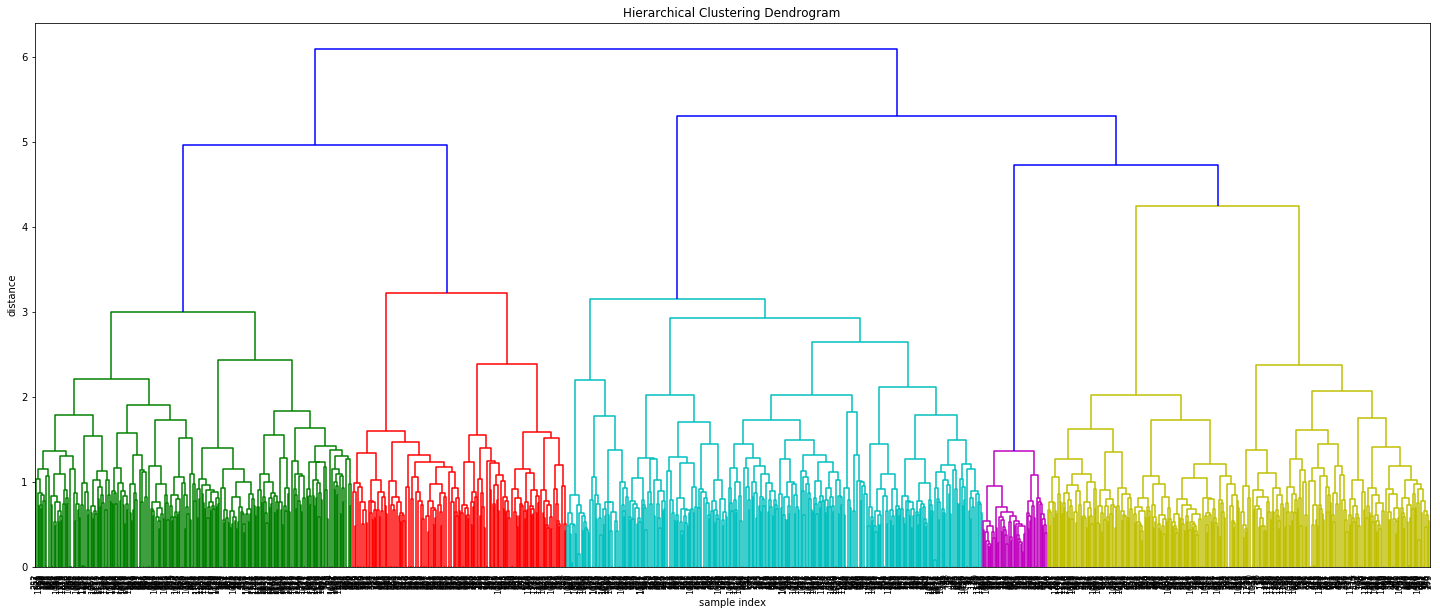

In [55]:
# calculate full dendrogram
plt.figure(figsize=(25, 10))
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('sample index')
plt.ylabel('distance')
dendrogram(
    Z,
    leaf_rotation=90.,  # rotates the x axis labels
    leaf_font_size=8.,  # font size for the x axis labels
)
plt.show()

If this is the first time you see a dendrogram, it's probably quite confusing, so let's take this apart...

On the x axis you see labels. If you don't specify anything else they are the indices of your samples in X.
On the y axis you see the distances (of the 'ward' method in our case).

Starting from each label at the bottom, you can see a vertical line up to a horizontal line. The height of that horizontal line tells you about the distance at which this label was merged into another label or cluster. You can find that other cluster by following the other vertical line down again. If you don't encounter another horizontal line, it was just merged with the other label you reach, otherwise it was merged into another cluster that was formed earlier.

Summarizing:

horizontal lines are cluster merges
vertical lines tell you which clusters/labels were part of merge forming that new cluster
heights of the horizontal lines tell you about the distance that needed to be "bridged" to form the new cluster
You can also see that from distances > 25 up there's a huge jump of the distance to the final merge at a distance of approx. 180. Let's have a look at the distances of the last 4 merges:

In [56]:
Z[-4:,2]
#Z.shape
# (1181, 4)

array([ 4.72788452,  4.96165624,  5.30310467,  6.09684856])

### Dendrogram Truncation

As you might have noticed, the above is pretty big for 1650 samples already and you probably have way more in real scenarios, so let me spend a few seconds on highlighting some other features of the dendrogram() function:

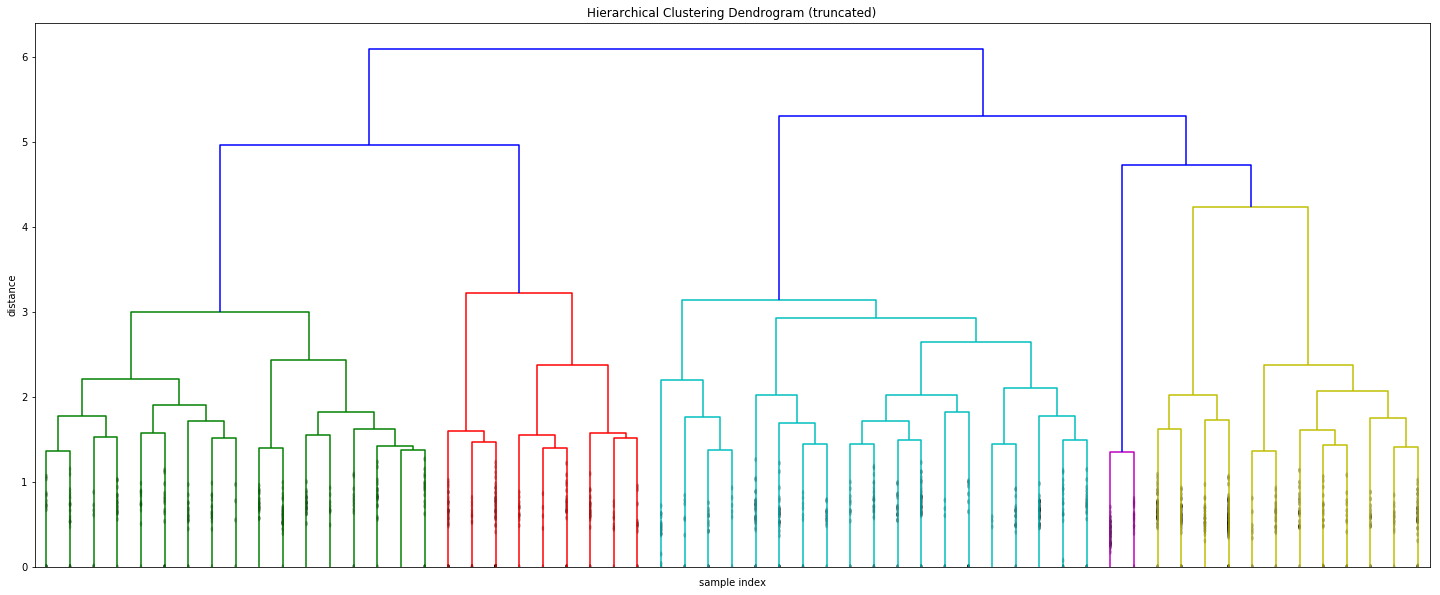

In [57]:
plt.figure(figsize=(25, 10))
plt.title('Hierarchical Clustering Dendrogram (truncated)')
plt.xlabel('sample index')
plt.ylabel('distance')
dendrogram(
    Z,
    truncate_mode='lastp',  # show only the last p merged clusters
    p=59,  # show only the last p merged clusters
    show_leaf_counts=False,  # otherwise numbers in brackets are counts
    leaf_rotation=90.,
    leaf_font_size=12.,
    show_contracted=True,  # to get a distribution impression in truncated branches
)
plt.show()

The above shows a truncated dendrogram, which only shows the last p=59 out of our 149 merges.

First thing you should notice that most labels are missing. This is because all samples were already merged into clusters before the last 12 merges.

The parameter show_contracted allows us to draw black dots at the heights of those previous cluster merges, so we can still spot gaps even if we don't want to clutter the whole visualization. In our example we can see that the dots are all at pretty small distances when compared to the huge last merge at a distance of 180, telling us that we probably didn't miss much there.

As it's kind of hard to keep track of the cluster sizes just by the dots, dendrogram() will by default also print the cluster sizes in brackets () if a cluster was truncated:

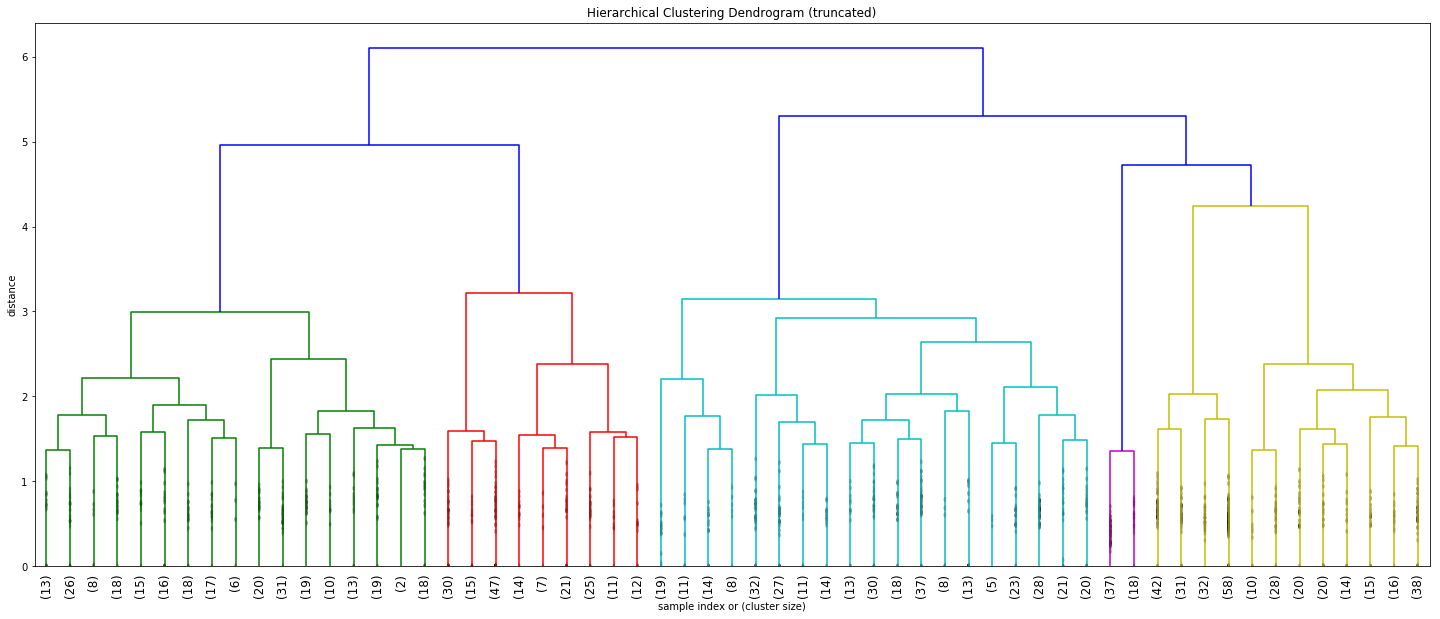

In [58]:
plt.figure(figsize=(25, 10))
plt.title('Hierarchical Clustering Dendrogram (truncated)')
plt.xlabel('sample index or (cluster size)')
plt.ylabel('distance')
dendrogram(
    Z,
    truncate_mode='lastp',  # show only the last p merged clusters
    p=59,  # show only the last p merged clusters
    leaf_rotation=90.,
    leaf_font_size=12.,
    show_contracted=True,  # to get a distribution impression in truncated branches
)
plt.show()

We can now see that the right most cluster already consisted of 38 samples before the last 59 merges.

### Eye Candy

Even though this already makes for quite a nice visualization, we can pimp it even more by also annotating the distances inside the dendrogram by using some of the useful return values dendrogram():

In [77]:
def fancy_dendrogram(*args, **kwargs):
    max_d = kwargs.pop('max_d', None)
    if max_d and 'color_threshold' not in kwargs:
        kwargs['color_threshold'] = max_d
    annotate_above = kwargs.pop('annotate_above', 0)

    ddata = dendrogram(*args, **kwargs)

    if not kwargs.get('no_plot', False):
        plt.title('Hierarchical Clustering Dendrogram (truncated)')
        plt.xlabel('sample index or (cluster size)')
        plt.ylabel('distance')
        for i, d, c in zip(ddata['icoord'], ddata['dcoord'], ddata['color_list']):
            x = 0.5 * sum(i[1:3])
            y = d[1]
            if y > annotate_above:
                plt.plot(x, y, 'o', c=c)
                plt.annotate("%.3g" % y, (x, y), xytext=(0, -5),
                             textcoords='offset points',
                             va='top', ha='center')
        if max_d:
            plt.axhline(y=max_d, c='k')
    return ddata

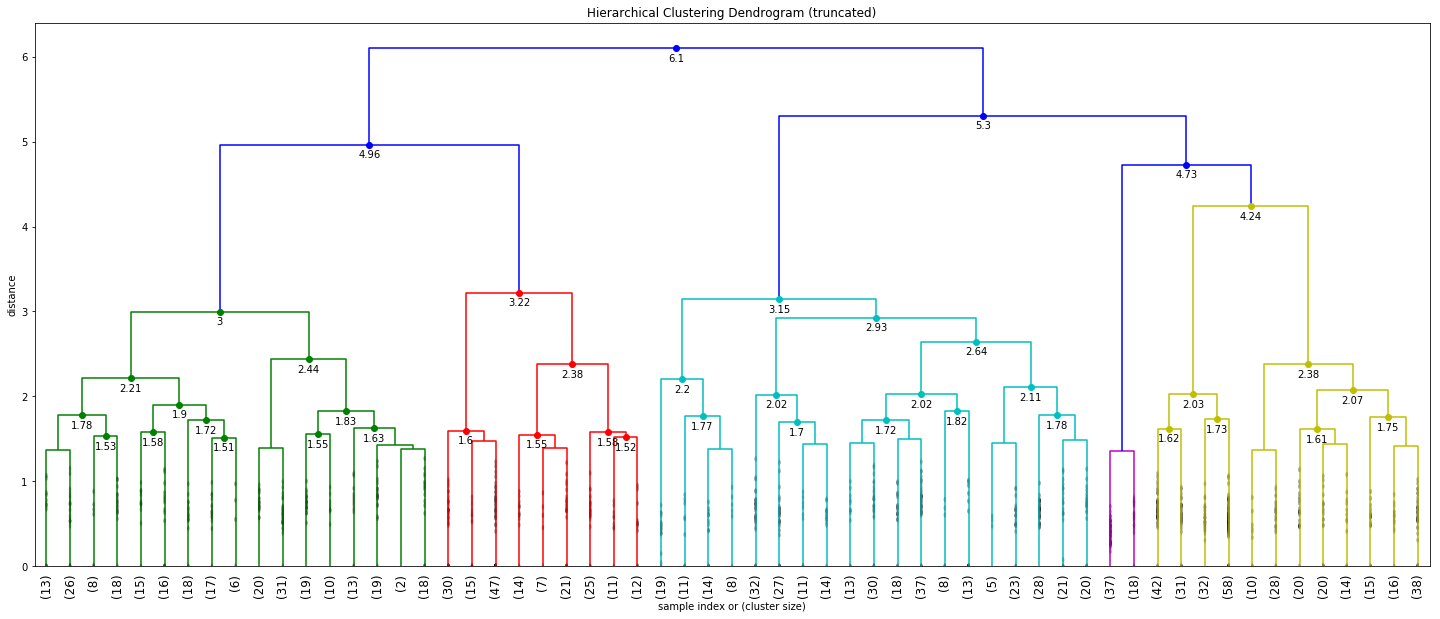

In [128]:
plt.figure(figsize=(25, 10))
fancy_dendrogram(
    Z,
    truncate_mode='lastp',
    p=59,
    leaf_rotation=90.,
    leaf_font_size=12.,
    show_contracted=True,
    annotate_above=1.5, # useful in small plots so annotations don't overlap
)
plt.show()

### Selecting a Distance Cut-Off aka Determining the Number of Clusters

As explained above already, a huge jump in distance is typically what we're interested in if we want to argue for a certain number of clusters. If you have the chance to do this manually, i'd always opt for that, as it allows you to gain some insights into your data and to perform some sanity checks on the edge cases. In our case i'd probably just say that our cut-off is 50, as the jump is pretty obvious:

In [79]:
# set cut-off to 50
max_d = 4  # max_d as in max_distance

Let's visualize this in the dendrogram as a cut-off line:

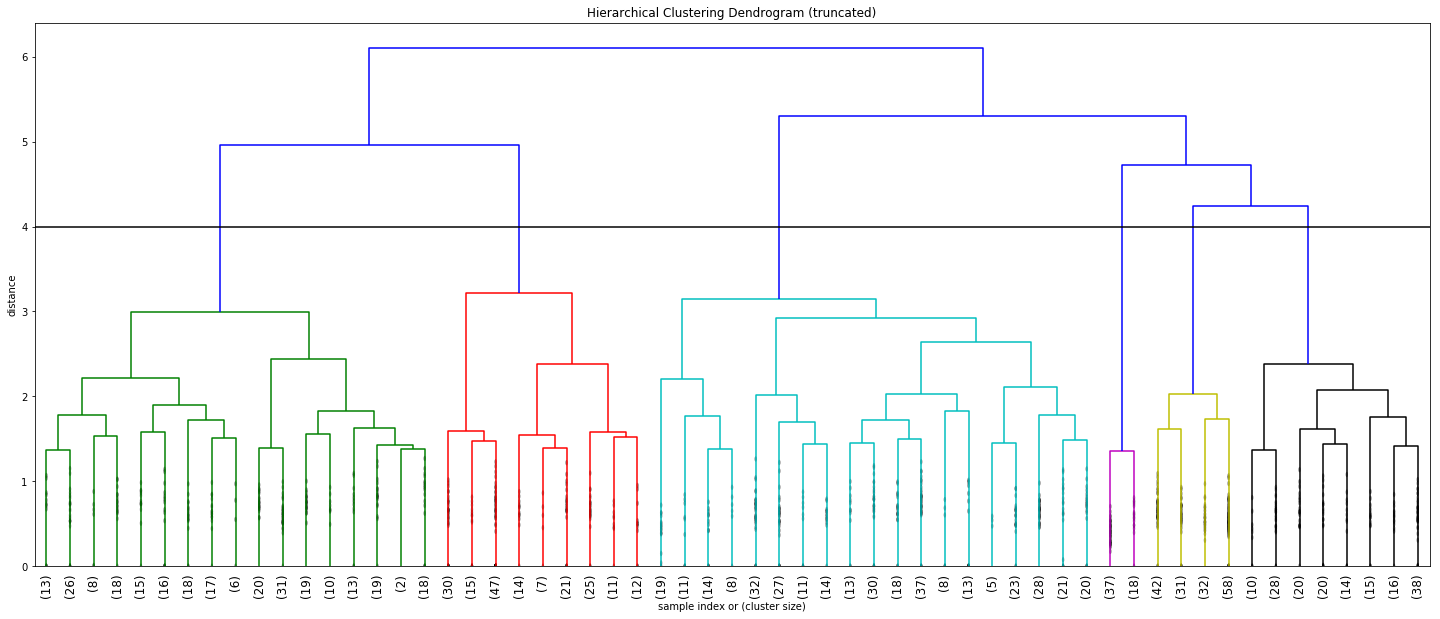

In [80]:
plt.figure(figsize=(25, 10))
fancy_dendrogram(
    Z,
    truncate_mode='lastp',
    p=59,
    leaf_rotation=90.,
    leaf_font_size=12.,
    show_contracted=True,
    annotate_above=10,
    max_d=max_d,  # plot a horizontal cut-off line
)
plt.show()

### Automated Cut-Off Selection (or why you shouldn't rely on this)

Now while this manual selection of a cut-off value offers a lot of benefits when it comes to checking for a meaningful clustering and cut-off, there are cases in which you want to automate this.

The problem again is that there is no golden method to pick the number of clusters for all cases (which is why i think the investigative & backtesting manual method is preferable). Wikipedia lists a couple of common methods. Reading this, you should realize how different the approaches and how vague their descriptions are.

I honestly think it's a really bad idea to just use any of those methods, unless you know the data you're working on really really well.

#### Inconsistency Method

For example, let's have a look at the "inconsistency" method, which seems to be one of the defaults for the fcluster() function in scipy.

The question driving the inconsistency method is "what makes a distance jump a jump?". It answers this by comparing each cluster merge's height h to the average avg and normalizing it by the standard deviation std formed over the depth previous levels:

inconsistency=(h−avgstd) / std      

The following shows a matrix of the avg, std, count, inconsistency for each of the last 100 merges of our hierarchical clustering with depth = 5

In [84]:
from scipy.cluster.hierarchy import inconsistent

depth = 5
incons = inconsistent(Z, depth)
incons[-100:]

array([[  0.68490233,   0.27512691,  21.        ,   1.70463062],
       [  0.65955218,   0.35217837,  12.        ,   1.40872337],
       [  0.59158795,   0.48702269,   6.        ,   1.1751362 ],
       [  0.77734324,   0.27642939,  12.        ,   1.40213152],
       [  0.59337256,   0.3755846 ,  18.        ,   1.52419532],
       [  0.53073617,   0.40299976,  25.        ,   1.60188015],
       [  0.66061446,   0.50762199,   4.        ,   1.01648389],
       [  0.5829913 ,   0.40245281,  12.        ,   1.48601429],
       [  0.74475233,   0.31975609,  17.        ,   1.37151005],
       [  0.68993401,   0.28084904,  12.        ,   1.75843108],
       [  0.71297246,   0.22818829,  24.        ,   2.06618479],
       [  0.5747471 ,   0.38880085,  10.        ,   1.59148585],
       [  0.69391297,   0.4168539 ,  17.        ,   1.2154598 ],
       [  0.65945001,   0.30778235,  25.        ,   1.76755275],
       [  0.74838432,   0.34332736,  15.        ,   1.33070058],
       [  0.73718247,   0

Now you might be tempted to say "yay, let's just pick 5" as a limit in the inconsistencies, but look at what happens if we set depth to 3 instead:

In [86]:
depth = 3
incons = inconsistent(Z, depth)
incons[-100:]

array([[ 0.80342527,  0.38229684,  7.        ,  0.91674   ],
       [ 0.77537314,  0.3696839 ,  7.        ,  1.02871925],
       [ 0.57556909,  0.54273782,  5.        ,  1.08401666],
       [ 0.79040698,  0.37186987,  7.        ,  1.00714428],
       [ 0.80486804,  0.39120249,  7.        ,  0.92271604],
       [ 0.83347585,  0.39218078,  7.        ,  0.87413168],
       [ 0.66061446,  0.50762199,  4.        ,  1.01648389],
       [ 0.75115051,  0.38590654,  7.        ,  1.11397805],
       [ 0.9653589 ,  0.13949354,  7.        ,  1.56238144],
       [ 0.751843  ,  0.44945779,  5.        ,  0.96103505],
       [ 0.82238235,  0.3828983 ,  7.        ,  0.94560171],
       [ 0.6135588 ,  0.4687778 ,  7.        ,  1.23717322],
       [ 0.89993799,  0.41145963,  7.        ,  0.73067716],
       [ 0.95105678,  0.16415476,  7.        ,  1.53766346],
       [ 0.85027415,  0.40588529,  7.        ,  0.87457243],
       [ 0.86135524,  0.43605668,  6.        ,  0.8195941 ],
       [ 0.80250748,  0.

Oups! This should make you realize that the inconsistency values heavily depend on the depth of the tree you calculate the averages over.

Another problem in its calculation is that the previous d levels' heights aren't normally distributed, but expected to increase, so you can't really just treat the current level as an "outlier" of a normal distribution, as it's expected to be bigger.

#### Elbow Method

Another thing you might see out there is a variant of the "elbow method". It tries to find the clustering step where the acceleration of distance growth is the biggest (the "strongest elbow" of the blue line graph below, which is the highest value of the green graph below):

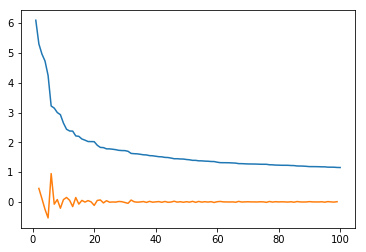

clusters: 6


In [89]:
last = Z[-100:, 2]
last_rev = last[::-1]
idxs = np.arange(1, len(last) + 1)
plt.plot(idxs, last_rev)

acceleration = np.diff(last, 2)  # 2nd derivative of the distances
acceleration_rev = acceleration[::-1]
plt.plot(idxs[:-2] + 1, acceleration_rev)
plt.show()
k = acceleration_rev.argmax() + 2  # if idx 0 is the max of this we want 2 clusters
print ("clusters:", k)

While this works nicely in our simplistic example (the green line takes its maximum for k=2), it's pretty flawed as well.

One issue of this method has to do with the way an "elbow" is defined: you need at least a right and a left point, which implies that this method will never be able to tell you that all your data is in one single cluster only.

Another problem with this variant lies in the np.diff(Z[:, 2], 2) though. The order of the distances in Z[:, 2] isn't properly reflecting the order of merges within one branch of the tree. In other words: there is no guarantee that the distance of Z[i] is contained in the branch of Z[i+1]. By simply computing the np.diff(Z[:, 2], 2) we assume that this doesn't matter and just compare distance jumps from different branches of our merge tree.



let's have a look at the dendrogram again and how you can use it to spot the problem:

### Retrieve the Clusters

Now, let's finally have a look at how to retrieve the clusters, for different ways of determining k. We can use the fcluster function.

** Knowing max_d: **

Let's say we determined the max distance with help of a dendrogram, then we can do the following to get the cluster id for each of our samples:

In [97]:
from scipy.cluster.hierarchy import fcluster
max_d = 4
clusters = fcluster(Z, max_d, criterion='distance')
clusters

array([6, 6, 6, ..., 1, 1, 6], dtype=int32)

** Knowing k: **

Another way starting from the dendrogram is to say "i can see i have k=2" clusters. You can then use:

In [103]:
k=6
fcluster(Z, k, criterion='maxclust')

** Using the Inconsistency Method (default): **

If you're really sure you want to use the inconsistency method to determine the number of clusters in your dataset, you can use the default criterion of fcluster() and hope you picked the correct values:

In [123]:
fcluster(Z, 8, depth=10)

## Latent Dirichlet Allocation

In [70]:
#strip any proper names from a text...unfortunately right now this is yanking the first word from a sentence too.
import string
def strip_proppers(text):
    # first tokenize by sentence, then by word to ensure that punctuation is caught as it's own token
    tokens = [word for sent in nltk.sent_tokenize(text) for word in nltk.word_tokenize(sent) if word.islower()]
    return "".join([" "+i if not i.startswith("'") and i not in string.punctuation else i for i in tokens]).strip()


In [71]:
#strip any proper nouns (NNP) or plural proper nouns (NNPS) from a text
from nltk.tag import pos_tag

def strip_proppers_POS(text):
    tagged = pos_tag(text.split()) #use NLTK's part of speech tagger
    non_propernouns = [word for word,pos in tagged if pos != 'NNP' and pos != 'NNPS']
    return non_propernouns

In [72]:
from gensim import corpora, models, similarities 
# pip install gensim
#remove proper names
#%time preprocess = [strip_proppers(doc) for doc in synopses]
for key, cv in dico_cv.items():
    cv.cv = strip_proppers(cv.cv)
    dico_cv[key] = cv

#tokenize
texts = list()
#%time tokenized_text = [tokenize_and_stem(text) for text in preprocess]
for key, cv in dico_cv.items():
    cv.cv = tokenize_and_stem(cv.cv)
    dico_cv[key] = cv
    texts.append(cv.cv)

#remove stop words
#%time texts = [[word for word in text if word not in stopwords] for text in tokenized_text]


In [73]:
#create a Gensim dictionary from the texts
dictionary = corpora.Dictionary(texts)

#remove extremes (similar to the min/max df step used when creating the tf-idf matrix)
dictionary.filter_extremes(no_below=1, no_above=0.8)

#convert the dictionary to a bag of words corpus for reference
corpus = [dictionary.doc2bow(text) for text in texts]

In [74]:
%time lda = models.LdaModel(corpus, num_topics=5, \
                            id2word=dictionary, \
                            update_every=5, \
                            chunksize=10000, \
                            passes=100)

CPU times: user 13min 52s, sys: 5.27 s, total: 13min 58s
Wall time: 8min 58s


In [75]:
lda.show_topics()

[(0,
  '0.021*"reseau" + 0.018*"informat" + 0.016*"administr" + 0.014*"system" + 0.010*"serveur" + 0.009*"technicien" + 0.008*"install" + 0.007*"gestion" + 0.007*"window" + 0.005*"configur"'),
 (1,
  '0.020*"gestion" + 0.013*"projet" + 0.011*"suiv" + 0.011*"manag" + 0.010*"client" + 0.009*"commercial" + 0.007*"respons" + 0.007*"plac" + 0.007*"recrut" + 0.006*"developp"'),
 (2,
  '0.025*"projet" + 0.017*"gestion" + 0.013*"oracl" + 0.013*"techniqu" + 0.011*"appliqu" + 0.011*"bas" + 0.010*"donne" + 0.009*"informat" + 0.009*"plac" + 0.009*"chef"'),
 (3,
  '0.017*"dat" + 0.014*"donne" + 0.012*"developp" + 0.012*"web" + 0.011*"informat" + 0.009*"developpeur" + 0.008*"analys" + 0.007*"competent" + 0.007*"c" + 0.007*"projet"'),
 (4,
  '0.010*"marketing" + 0.009*"analys" + 0.008*"etud" + 0.006*"client" + 0.006*"strateg" + 0.006*"business" + 0.006*"realis" + 0.005*"commun" + 0.005*"developp" + 0.005*"produit"')]

In [76]:
topics_matrix = lda.show_topics(formatted=False, num_words=20)
topics_matrix = np.array(topics_matrix)

topic_words = topics_matrix[:,:,1]
for i in topic_words:
    print([str(word) for word in i])
    print()

ValueError: setting an array element with a sequence

In [77]:
topics_matrix

[(0,
  [('reseau', 0.021426933),
   ('informat', 0.018453222),
   ('administr', 0.01635587),
   ('system', 0.014026303),
   ('serveur', 0.0096392483),
   ('technicien', 0.0088342158),
   ('install', 0.0078202644),
   ('gestion', 0.0074237171),
   ('window', 0.0073676538),
   ('configur', 0.0053341403),
   ('utilis', 0.00480441),
   ('securit', 0.00473443),
   ('creation', 0.0047256551),
   ('plac', 0.0046922942),
   ('mainten', 0.0046621147),
   ('servic', 0.00444311),
   ('logiciel', 0.0040525608),
   ('materiel', 0.0038301512),
   ('manag', 0.0037258859),
   ('competent', 0.0037068918)]),
 (1,
  [('gestion', 0.019980542),
   ('projet', 0.012682618),
   ('suiv', 0.01097815),
   ('manag', 0.010571774),
   ('client', 0.010017592),
   ('commercial', 0.0085621728),
   ('respons', 0.0068115816),
   ('plac', 0.0066540674),
   ('recrut', 0.0065894458),
   ('developp', 0.006142037),
   ('equip', 0.0060403594),
   ('servic', 0.0058706095),
   ('business', 0.00586223),
   ('group', 0.005737355)

** TF-IDF **

In [ ]:
tfidf_vectorizer = TfidfVectorizer(preprocessor=text_treatment,tokenizer=tokenize_and_stem,stop_words=stop_words_main, \
                       max_df=1.0, \
                                #   min_df=0.2, \
                                   ngram_range=(1,3))

#min_df : float in range [0.0, 1.0] or int, default=1
#When building the vocabulary ignore terms that have a document frequency strictly lower than the given threshold. This value is also called cut-off in the literature. If float, the parameter represents a proportion of documents, 
#integer absolute counts. This parameter is ignored if vocabulary is not None.


%time tfidf_matrix = tfidf_vectorizer.fit_transform(liste_cv_no_stop) #fit the vectorizer to text


print(tfidf_matrix.shape)

In [ ]:
terms = tfidf_vectorizer.get_feature_names()

In [ ]:
dist = 1 - cosine_similarity(tfidf_matrix)

K-means clustering

In [ ]:
from sklearn.cluster import KMeans

num_clusters = 5

km = KMeans(n_clusters=num_clusters, n_jobs=-1)

%time km.fit(tfidf_matrix)

clusters = km.labels_.tolist()

In [ ]:
# Here, I create a dictionary of titles, cv body, the cluster assignment
cv_titles = [cv.title for cv in dico_cv.values()]
cv_bodies = [cv.cv for cv in dico_cv.values()]
#cv_titles = [cv.title for cv in dico_cv.values()]

cvs = { 'title': cv_titles, 'cv': cv_bodies, 'cluster': clusters }
#cvs = { 'title': cv_titles,  'cluster': clusters }

In [ ]:
print(len(cv_titles))
print(len(cv_bodies))
print(len(clusters))
#clusters

In [ ]:
frame = pd.DataFrame(cvs, index = [clusters] , columns = ['title', 'cluster'])

In [ ]:
frame

In [ ]:
frame['cluster'].value_counts() #number of cv per cluster

In [ ]:
from __future__ import print_function
cluster_names = {}

print("Top terms per cluster:")
print()
#sort cluster centers by proximity to centroid
order_centroids = km.cluster_centers_.argsort()[:, ::-1] 

for i in range(num_clusters):
    print("Cluster %d words:" % i, end='')
    
    txt = ""
    for ind in order_centroids[i, :6]: #replace 6 with n words per cluster
        txt = txt + vocab_frame.loc[terms[ind].split(' ')].values.tolist()[0][0] + ", "
        print(' %s' % vocab_frame.loc[terms[ind].split(' ')].values.tolist()[0][0].encode('utf-8', 'ignore'), end=',')
    cluster_names[i] = txt
    print() #add whitespace
    print() #add whitespace
    
    print("Cluster %d titles:" % i, end='')
    for title in frame.ix[i]['title'].values.tolist():
        print('     %s;' % title, end='')
        #print('\n')
    print() #add whitespace
    print() #add whitespace
    
print()
print()

#### Visualisation clusters

In [ ]:
import os  # for os.path.basename

import matplotlib.pyplot as plt
import matplotlib as mpl

from sklearn.manifold import MDS

MDS()

# convert two components as we're plotting points in a two-dimensional plane
# "precomputed" because we provide a distance matrix
# we will also specify `random_state` so the plot is reproducible.
mds = MDS(n_components=2, dissimilarity="precomputed", random_state=1, n_jobs=-1)

pos = mds.fit_transform(dist)  # shape (n_components, n_samples)

xs, ys = pos[:, 0], pos[:, 1]
print()
print()

In [ ]:
#set up colors per clusters using a dict
cluster_colors = {0: '#1b9e77', 1: '#d95f02', 2: '#7570b3', 3: '#e7298a', 4: '#66a61e'}

#set up cluster names using a dict
#cluster_names = {0: 'informatiques, donnee, gestion, formation, developpement, projet', 
#                 1: 'Police, killed, murders', 
#                 2: 'Father, New York, brothers', 
#                 3: 'Dance, singing, love', 
#                 4: 'Killed, soldiers, captain'}

In [ ]:
cluster_names

In [ ]:
#some ipython magic to show the matplotlib plots inline
%matplotlib inline 

#create data frame that has the result of the MDS plus the cluster numbers and titles
df = pd.DataFrame(dict(x=xs, y=ys, label=clusters))#, title=cv_titles)) 

#group by cluster
groups = df.groupby('label')


# set up plot
fig, ax = plt.subplots(figsize=(17, 9)) # set size
ax.margins(0.05) # Optional, just adds 5% padding to the autoscaling

#iterate through groups to layer the plot
#note that I use the cluster_name and cluster_color dicts with the 'name' lookup to return the appropriate color/label
for name, group in groups:
    ax.plot(group.x, group.y, marker='o', linestyle='', ms=12, 
            label=cluster_names[name], color=cluster_colors[name], 
            mec='none')
    ax.set_aspect('auto')
    ax.tick_params(\
        axis= 'x',          # changes apply to the x-axis
        which='both',      # both major and minor ticks are affected
        bottom='off',      # ticks along the bottom edge are off
        top='off',         # ticks along the top edge are off
        labelbottom='off')
    ax.tick_params(\
        axis= 'y',         # changes apply to the y-axis
        which='both',      # both major and minor ticks are affected
        left='off',      # ticks along the bottom edge are off
        top='off',         # ticks along the top edge are off
        labelleft='off')
    
ax.legend(numpoints=1)  #show legend with only 1 point

#add label in x,y position with the label as the film title
for i in range(len(df)):
    ax.text(df.ix[i]['x'], df.ix[i]['y'], df.ix[i]['title'], size=8)  

    
    
plt.show() #show the plot

#uncomment the below to save the plot if need be
#plt.savefig('clusters_small_noaxes.png', dpi=200)


In [ ]:
from __future__ import print_function

print("Top terms per cluster:")
print()
#sort cluster centers by proximity to centroid
order_centroids = km.cluster_centers_.argsort()[:, ::-1] 

for i in range(num_clusters):
    print("Cluster %d words:" % i, end='')
    
    for ind in order_centroids[i, :6]: #replace 6 with n words per cluster
        print(terms[ind])
        print(' %s' % vocab_frame.loc[terms[ind].split(' ')].values.tolist()[0][0].encode('utf-8', 'ignore'), end=',')
    print() #add whitespace
    print() #add whitespace
    
    print("Cluster %d titles:" % i, end='')
    for title in frame.ix[i]['title'].values.tolist():
        print(' %s,' % title, end='')
    print() #add whitespace
    print() #add whitespace
    
print()
print()